<a href="https://colab.research.google.com/github/tidaltamu/workshop-data/blob/main/beginner/workshop4/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginner Workshop 4

### Polynomial Regression

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/tidaltamu/workshop-data/main/beginner/workshop4/data/poly_regression.csv")
df.head()

,X,y
0,0.289299,0.498330
1,0.873401,-0.873236
2,0.187359,1.004781
3,0.491929,-0.393222
4,0.638054,-1.128250


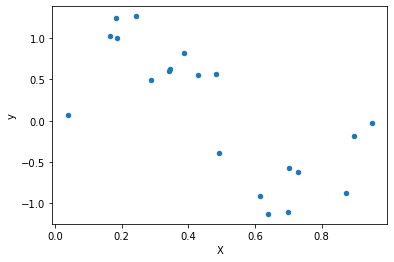

In [2]:
df.plot(x='X', y='y', kind="scatter")
# data is a sinusoid with noise, we will fit a polynomial to it

In [3]:
# split into independent and dependent variables
import numpy as np
X = df['X'].to_numpy().reshape(-1, 1)   # reshape will make it a 2d array
y = df['y'].to_numpy().reshape(-1, 1)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# make_pipeline essentially says that we are using Linear Regression with Polynomial Features
# Polynomial Features generates a matrix of all combinations of features up to the specified degree
#   - If we had two features x and y and degree 2, the generated matrix would contain 1, x, y, x^2, xy, and y^2
#   - For one feature x and degree 3, we would have 1, x, x^2, and x^3
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(X, y);

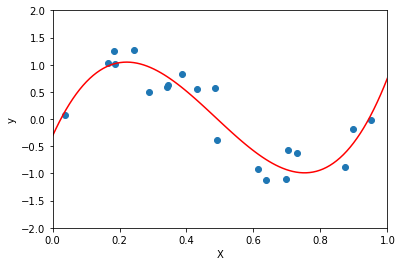

In [5]:
import matplotlib.pyplot as plt

x_plot = np.linspace(0, 1, 100)     # to plot our model, we will predict over an interval
                                    # we wouldn't actually do this, this is for demonstration puroposes
plt.scatter(X, y)
plt.plot(x_plot, model.predict(x_plot.reshape(-1, 1)), c='r')   # predicts for interval
plt.ylim((-2, 2))
plt.xlim((0, 1))
plt.ylabel('y')
plt.xlabel('X');
# try changing degree to 1, then 5, then 9

## Regularized Linear Regression

In [6]:
from sklearn.linear_model import Ridge

# Ridge is linear regression with Linear Least Squares as the loss function and L1 Regularization
#   - We won't cover what that means, just know that it serves the same purpose
model = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.0))
model.fit(X, y);

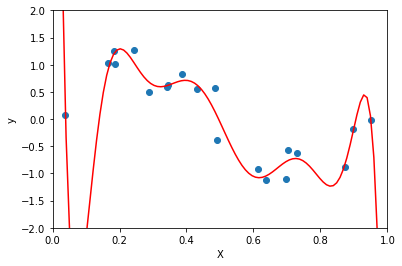

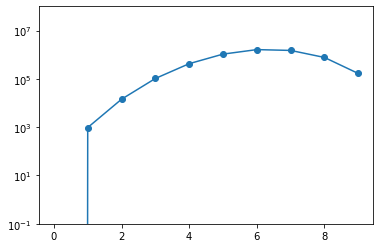

In [7]:
x_plot = np.linspace(0, 1, 100)     # to plot our model, we will predict over an interval
                                    # we wouldn't actually do this, this is for demonstration puroposes
plt.scatter(X, y)
plt.plot(x_plot, model.predict(x_plot.reshape(-1, 1)), c='r')
plt.ylim((-2, 2))
plt.xlim((0, 1))
plt.ylabel('y')
plt.xlabel('X')
plt.show()

# plot coeffciients
coef = model.steps[-1][1].coef_.ravel()   # get coefficients of hypothesis (expect 10: 1, x, x^2, ..., x^9)
plt.semilogy(np.abs(coef), marker='o')  # semilogy is linear along x axis and logarithmic along y
plt.ylim((1e-1, 1e8));

## Regularized Logistic Regression

In [8]:
# very popular dataset, included in sklearn
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [9]:
# separate independent and dependent variables
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X = X[y != 2]   # we will only consider setosa and versicolor
y = y[y != 2]   
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression

# C is inverse of lambda; small c means high lambda, which means stronger 
#   regularization (should expect coefficients to be near 0)
c = 0.001
model = LogisticRegression(penalty="l2", C=c, solver="liblinear")
model.fit(X_train, y_train);

In [13]:
# hard to graph, but we could print out info
print('C:', c)
print('Coefficient of each feature:', model.coef_)
print('Test accuracy:', model.score(X_test, y_test))
# try changing c to 0.1, 1, and 10

C: 0.001
Coefficient of each feature: [[ 0.00467351 -0.01956461  0.04674533  0.01890183]]
Test accuracy: 0.55


#One Hot Encoder


In [14]:
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
data = pd.DataFrame(data)
data

,0
0,cold
1,cold
2,warm
3,cold
4,hot
5,hot
6,warm
7,cold
8,warm
9,hot


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.compose import ColumnTransformer
label_encoder_x= LabelEncoder()  
data = label_encoder_x.fit_transform(data)
data

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 2, 0, 1, 1, 2, 0, 2, 1])

In [16]:
onehot_encoder = OneHotEncoder(sparse=False)
data = data.reshape(len(data), 1)
data = onehot_encoder.fit_transform(data)
data

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

#Normalization

MinMax Scaler

In [17]:
sample_data = pd.read_csv('https://raw.githubusercontent.com/tidaltamu/workshop-data/main/beginner/workshop4/data/wine_data.csv', usecols = [1, 2], nrows= 5)
sample_data.columns = ['variable1', 'variable2']
sample_data.head()

,variable1,variable2
0,13.20,1.78
1,13.16,2.36
2,14.37,1.95
3,13.24,2.59
4,14.20,1.76


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(sample_data)
#could've also done scaler.fit_transform(sample_data[['variable1','variable2']])


array([[0.03305785, 0.02409639],
       [0.        , 0.72289157],
       [1.        , 0.22891566],
       [0.0661157 , 1.        ],
       [0.85950413, 0.        ]])

Standardization

In [19]:
sample_data.describe()

,variable1,variable2
count,5.00000,5.000000
mean,13.63400,2.088000
std,0.59798,0.369959
min,13.16000,1.760000
25%,13.20000,1.780000
50%,13.24000,1.950000
75%,14.20000,2.360000
max,14.37000,2.590000


In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit_transform(sample_data)

array([[-0.8114432 , -0.93078974],
       [-0.88623059,  0.82199614],
       [ 1.37608801, -0.41704216],
       [-0.73665581,  1.5170664 ],
       [ 1.05824159, -0.99123064]])

#Dealing with missing values

In [21]:
ufo_data = pd.read_csv('https://raw.githubusercontent.com/tidaltamu/workshop-data/main/beginner/workshop4/data/ufo.csv')
ufo_data.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00
